<a href="https://colab.research.google.com/github/HarshitGupta1511/AI_ChatBot_NLP/blob/master/mini_dwm_hg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

User Similarity Matrix:
 User         A         B         C         D         E
User                                                  
A     1.000000  0.866622  0.265036  0.316228  0.565685
B     0.866622  1.000000  0.000000  0.415227  0.371391
C     0.265036  0.000000  1.000000  0.698430  0.000000
D     0.316228  0.415227  0.698430  1.000000  0.000000
E     0.565685  0.371391  0.000000  0.000000  1.000000

Top 2 similar users to E: ['A', 'B']

Recommended Books for User E:
 Book
Book1    10.0
Book2     3.0
Book4     0.0
dtype: object


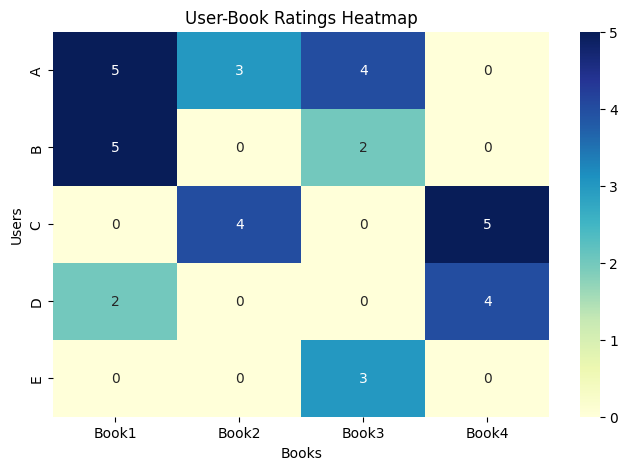

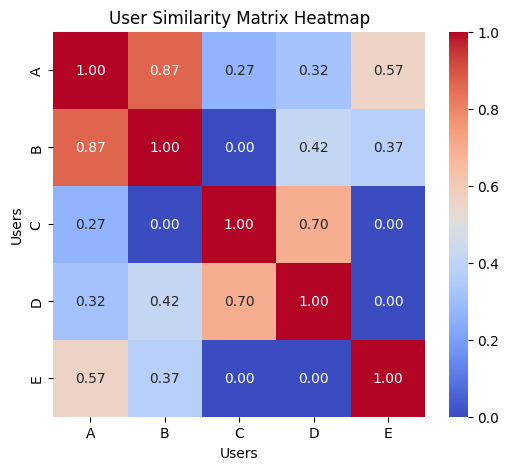

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Sample dataset: User-Book ratings
data = {
    'User': ['A', 'A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E'],
    'Book': ['Book1', 'Book2', 'Book3', 'Book1', 'Book3', 'Book2', 'Book4', 'Book1', 'Book4', 'Book3'],
    'Rating': [5, 3, 4, 5, 2, 4, 5, 2, 4, 3]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create user-item matrix
user_book_matrix = df.pivot_table(index='User', columns='Book', values='Rating').fillna(0)

# Compute similarity between users
user_similarity = cosine_similarity(user_book_matrix)
user_sim_df = pd.DataFrame(user_similarity, index=user_book_matrix.index, columns=user_book_matrix.index)

print("User Similarity Matrix:\n", user_sim_df)

# Function to recommend books
def recommend_books(target_user, top_n_similar=2):
    similar_users = user_sim_df[target_user].sort_values(ascending=False)[1:top_n_similar+1].index
    print(f"\nTop {top_n_similar} similar users to {target_user}: {list(similar_users)}")

    target_books = user_book_matrix.loc[target_user]
    recommended_books = pd.Series()

    for user in similar_users:
        user_ratings = user_book_matrix.loc[user]
        unrated_books = user_ratings[target_books == 0]
        recommended_books = recommended_books.add(unrated_books, fill_value=0)

    recommended_books = recommended_books.sort_values(ascending=False)
    return recommended_books.head(3)

# Recommend books for user 'E'
recommended = recommend_books('E')
print("\nRecommended Books for User E:\n", recommended)

# Heatmap of User-Book Ratings
plt.figure(figsize=(8, 5))
sns.heatmap(user_book_matrix, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('User-Book Ratings Heatmap')
plt.xlabel('Books')
plt.ylabel('Users')
plt.show()

# Heatmap of User Similarity Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(user_sim_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('User Similarity Matrix Heatmap')
plt.xlabel('Users')
plt.ylabel('Users')
plt.show()
